In [ ]:
#@title Default title text
import pandas as pd 
import numpy as np 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

# lets load and read the file

df = pd.read_csv('drugEffects.csv')
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,effectiveness,sideEffects
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,Ineffective,Moderate Side Effects
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,Highly Effective,Severe Side Effects
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,Considerably Effective,Extremely Severe Side Effects
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,05-Mar-17,35,Ineffective,Mild Side Effects
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,Ineffective,Extremely Severe Side Effects


In [ ]:
# To List 15 rows of your data

df[['drugName', 'condition']].head(15)

,drugName,condition
0,Mirtazapine,Depression
1,Mesalamine,"Crohn's Disease, Maintenance"
2,Bactrim,Urinary Tract Infection
3,Contrave,Weight Loss
4,Cyclafem 1 / 35,Birth Control
5,Zyclara,Keratosis
6,Copper,Birth Control
7,Amitriptyline,Migraine Prevention
8,Methadone,Opiate Withdrawal
9,Levora,Birth Control


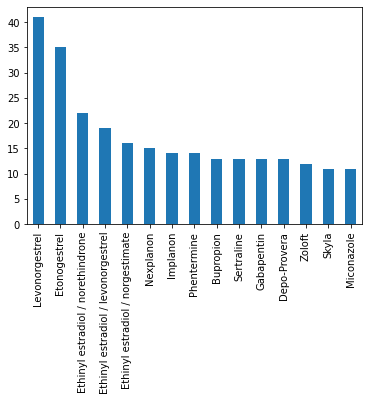

In [ ]:
# To check the list of drugs availabe (top 10)

df['drugName'].value_counts().head(15).plot(kind='bar')
plt.rcParams['figure.figsize'] = (10,7)
plt.show()

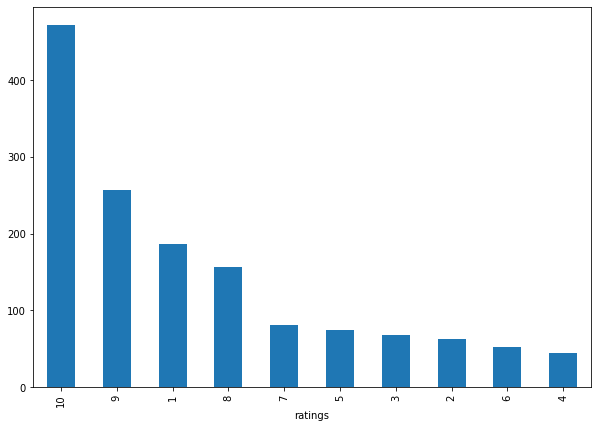

In [ ]:
# To check the ratings of the drugs 

df['rating'].value_counts().plot(kind='bar')
plt.xlabel('ratings')
plt.show()

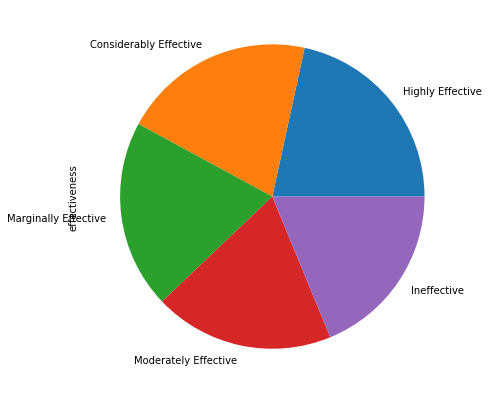

In [ ]:
# To check the effectiveness of the drugs

df['effectiveness'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
df['condition'].value_counts()

Birth Control                     275
Depression                         86
Pain                               54
Acne                               52
Anxiety                            50
                                 ... 
Dysuria                             1
Alopecia                            1
Rat-bite Feve                       1
Borderline Personality Disorde      1
Hypodermoclysis                     1
Name: condition, Length: 239, dtype: int64

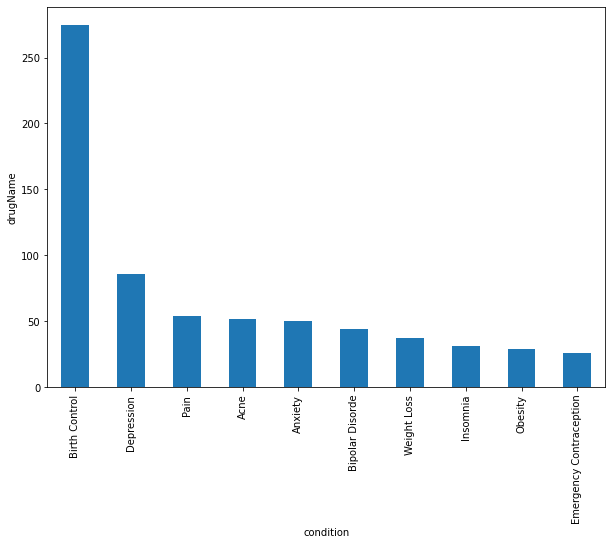

In [ ]:
# To check the various conditions the medicine cures (top 10) since they are over thousand

df['condition'].value_counts().head(10).plot(kind='bar')
plt.xlabel('condition')
plt.ylabel('drugName')
plt.show()

In [ ]:
# splitting data into train and validation

x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=.3)

NameError: ignored

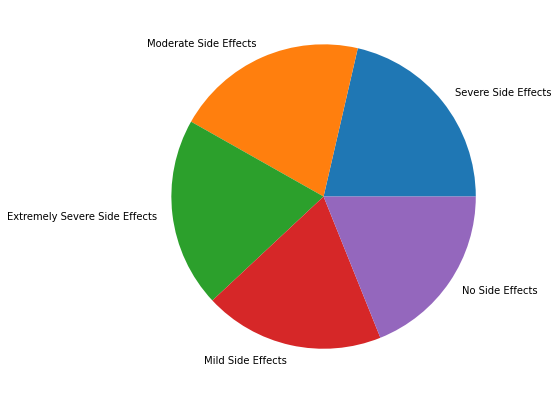

In [ ]:
# To check our target variable 'sideEffects'

df['sideEffects'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [ ]:
# put target into a seperate columns
target = df.pop('sideEffects')
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,effectiveness
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,Ineffective
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,Highly Effective
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,Considerably Effective
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,05-Mar-17,35,Ineffective
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,Ineffective


In [ ]:
# To convert categorical data to numeric

cols = ['drugName', 'effectiveness', 'condition']

for x in cols:
  df[x] = pd.factorize(df[x])[0]

target = pd.factorize(target)[0]
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,effectiveness
0,163740,0,0,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,0
1,206473,1,1,"""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,1
2,159672,2,2,"""Quick reduction of symptoms""",9,29-Sep-17,3,2
3,39293,3,3,"""Contrave combines drugs that were used for al...",9,05-Mar-17,35,0
4,97768,4,4,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,0
